# Computational Thinking Foundations

In [2]:
import numpy as np
import matplotlib.pyplot as plt

As an example, we will compute the following integral numerically.
$$
\int_0^1 \sqrt{1 - x^2} \, \text{d}x = \frac{\pi}{4}
$$

You can see this is basically the area of a quarter of circle. Let's define the function

In [3]:
def f(x):
    return np.sqrt(1 - x ** 2)

We can create an array of $x$ values and then apply the function $f$ on each component.

In [4]:
x_array = np.linspace(0, 1, 101)
y_array = f(x_array)

We can even plot these values

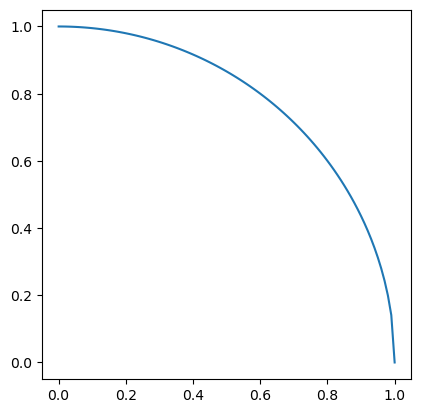

In [10]:
fig, ax = plt.subplots()
ax.plot(x_array, y_array)
ax.set_aspect("equal")

Let's create a box that contains this function

In [8]:
x_min = 0
x_max = 1
y_min = 0
y_max = 1

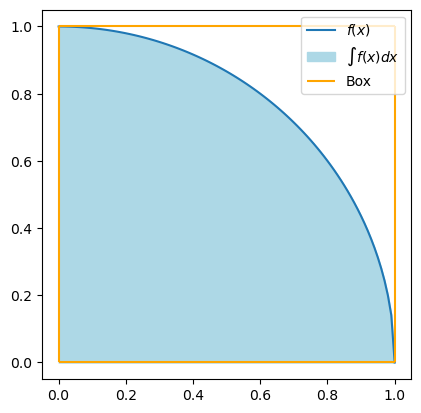

In [11]:
fig, ax = plt.subplots()
ax.plot(x_array, y_array, label=r"$f(x)$")
ax.fill_between(x_array, y_array, color="lightblue", label=r"$\int f(x) dx$")
ax.hlines([y_min, y_max], xmin=x_min, xmax=x_max, colors="orange", label="Box")
ax.vlines([x_min, x_max], ymin=y_min, ymax=y_max, colors="orange")
ax.legend()
ax.set_aspect("equal")

Note that the box can be any area that contains the area under the curve of the function we want to integrate. However, bigger boxes have less approximation accuracy.

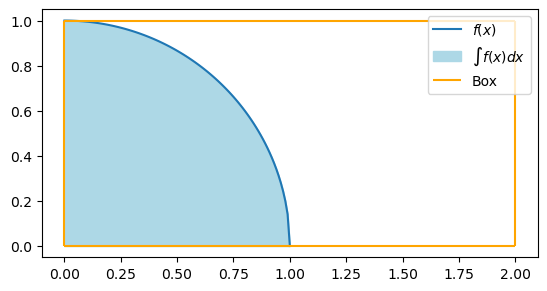

In [12]:
fig, ax = plt.subplots()
ax.plot(x_array, y_array, label=r"$f(x)$")
ax.fill_between(x_array, y_array, color="lightblue", label=r"$\int f(x) dx$")
ax.hlines([y_min, y_max], xmin=x_min, xmax=2*x_max, colors="orange", label="Box")
ax.vlines([x_min, 2*x_max], ymin=y_min, ymax=y_max, colors="orange")
ax.legend()
ax.set_aspect("equal")

Let's create a random point inside the box using a uniform distribution

In [14]:
x_rndm = np.random.uniform(x_min, x_max)
y_rndm = np.random.uniform(x_min, y_max)
print(x_rndm, y_rndm)  # Run this several times and notice how it changes

0.3918043878921168 0.22213744621432951


You can even visualize this point and check if it is under or over the curve.

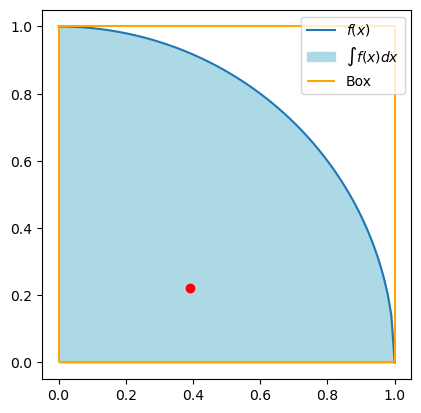

In [15]:
fig, ax = plt.subplots()
ax.plot(x_array, y_array, label=r"$f(x)$")
ax.fill_between(x_array, y_array, color="lightblue", label=r"$\int f(x) dx$")
ax.hlines([y_min, y_max], xmin=x_min, xmax=x_max, colors="orange", label="Box")
ax.vlines([x_min, x_max], ymin=y_min, ymax=y_max, colors="orange")
ax.scatter(x_rndm, y_rndm, color="red")
ax.legend()
ax.set_aspect("equal")

However, how can you cound hundreds or thousands of points?

Well, a point $(x^\star, y^\star)$ a point is under the curve of $f(x)$ if

$$
y^\star < f(x^\star)
$$

This can be checked with boolean operations:

In [39]:
y_rndm < f(x_rndm)

True

Now, the algorithm to approximate the area the curve can be simplified to:
1. Set $n$ as the number of random points
1. Compute the area of the box
1. Initialize a success counter
1. Iterate $n$ times:
    - Create a random point $(x^\star, y^\star)$
    - If $y^\star < f(x^\star)$ increase the sucess counter
1. Return ratio of sucess multiplied by the box area

In [16]:
n = 100  # Number of dots
area = (x_max - x_min) * (y_max - y_min)  # Area of the box
counter = 0                                   # Success counter
for i in range(n):
     x_rndm = np.random.uniform(x_min, x_max)
     y_rndm = np.random.uniform(y_min, y_max)
     if y_rndm < f(x_rndm):
        counter += 1  # Increase counter
approx = counter / n * area
print(f"The area under the curcve is approximately {approx} using {n} points.")

The area under the curcve is approximately 0.76 using 100 points.


However, notice the real area is

In [ ]:
np.pi / 4  # Real area

0.7853981633974483

It is important to have a notion of error as well in order to understand how good is our algorithm doing.

In [46]:
error_abs = np.abs(np.pi / 4 - approx)
error_quad = np.abs(np.pi / 4 - approx) ** 2
error_relative = np.abs(np.pi / 4 - approx) / np.abs(np.pi / 4 )

print(f"Absolute error: {error_abs}")
print(f"Quadratic error: {error_quad}")
print(f"Relative error: {error_relative}")

Absolute error: 0.005398163397448252
Quadratic error: 2.914016806555006e-05
Relative error: 0.006873155106573032


It is interesting to note that loops sometimes can be avoided in a vectoral way. For example, the function `np.randodm.uniform` allows to generate as many points as we want. Also, booleans conditions can be applied as a mask to full arrays and then you can sum over all over the `True` values. Python applies a rule rule when it considers `True` as 1 and `False` as 0.

In [52]:
n = 100
x_array_rndm = np.random.uniform(x_min, x_max, size=n)  # n random x coords
y_array_rndm = np.random.uniform(y_min, y_max, size=n)  # n random y coords
mask = y_array_rndm < f(x_array_rndm)  # Booleans values, trues and falses
counter = mask.sum()  # Count all the True values
approx = counter / n * area
print(f"The area under the curcve is approximately {approx} using {n} points.")

The area under the curcve is approximately 0.82 using 100 points.


We can even take advantage of the mask created and using it for plotting sucesses and fails with different colors and shapes

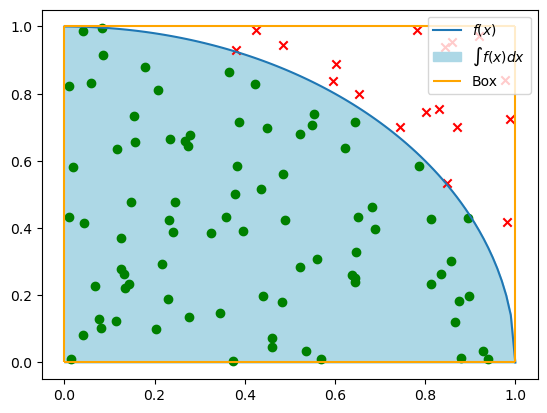

In [96]:
fig, ax = plt.subplots()
ax.plot(x_array, y_array, label=r"$f(x)$")
ax.fill_between(x_array, y_array, color="lightblue", label=r"$\int f(x) dx$")
ax.hlines([y_min, y_max], xmin=x_min, xmax=x_max, colors="orange", label="Box")
ax.vlines([x_min, x_max], ymin=y_min, ymax=y_max, colors="orange")
ax.scatter(x_array_rndm[mask], y_array_rndm[mask], color="green")  # Successes
ax.scatter(x_array_rndm[~mask], y_array_rndm[~mask], color="red", marker="x")  # Fails
ax.legend()
plt.show()

We can create a function that encapsulates all this process and then we can try any function $f(x)$ or any number or random points $n$.

In [57]:
def monte_carlo_function(f, n, x_min, x_max, y_min, y_max):
    area = (x_max - x_min) * (y_max - y_min)
    x_rndms = np.random.uniform(x_min, x_max, size=n)
    y_rndms = np.random.uniform(y_min, y_max, size=n)
    mask = y_rndms < f(x_rndms)
    counter = mask.sum()
    return counter / n * area

In [93]:
n_list = [10, 100, 1000, 10000, 100000]
repetitions = 30  # Repetitions for each n
approx_dict = {}
for n in n_list:
    approxs = [] 
    for _ in range(repetitions):
        approx = monte_carlo_function(f, n, x_min, x_max, y_min, y_max)
        approxs.append(approx)
    approx_dict[n] = approxs

Let's plot the results with violin plot in order to undesrtand the spread of estimations.

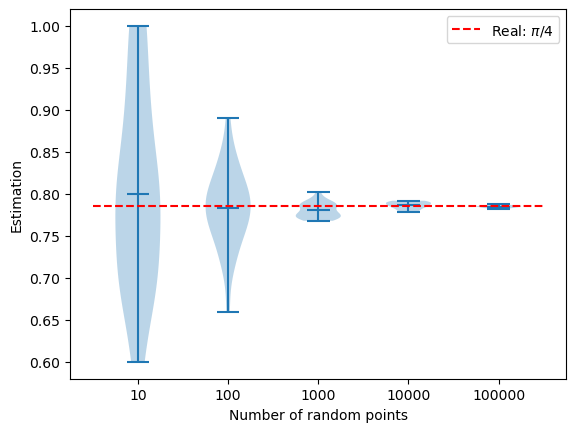

In [94]:
fig, ax = plt.subplots()
ax.violinplot(approx_dict.values(), showmeans=True)
n_len = len(n_list)
ax.set_xticks(ticks=np.arange(1, n_len + 1), labels=n_list)
ax.hlines(np.pi / 4, xmin=0.5, xmax=n_len + 0.5, linestyles="dashed", colors="red", label=r"Real: $\pi / 4$")
ax.legend()
ax.set_xlabel("Number of random points")
ax.set_ylabel("Estimation")
plt.show()